In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR = 'images/images/train'
TEST_DIR = 'images/images/test'


In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)


angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                       image     label
0            images/images/train\angry\0.jpg     angry
1            images/images/train\angry\1.jpg     angry
2           images/images/train\angry\10.jpg     angry
3        images/images/train\angry\10002.jpg     angry
4        images/images/train\angry\10016.jpg     angry
...                                      ...       ...
28816  images/images/train\surprise\9969.jpg  surprise
28817  images/images/train\surprise\9985.jpg  surprise
28818  images/images/train\surprise\9990.jpg  surprise
28819  images/images/train\surprise\9992.jpg  surprise
28820  images/images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)


angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)
print(test['image'])

                                     image     label
0       images/images/test\angry\10052.jpg     angry
1       images/images/test\angry\10065.jpg     angry
2       images/images/test\angry\10079.jpg     angry
3       images/images/test\angry\10095.jpg     angry
4       images/images/test\angry\10121.jpg     angry
...                                    ...       ...
7061  images/images/test\surprise\9806.jpg  surprise
7062  images/images/test\surprise\9830.jpg  surprise
7063  images/images/test\surprise\9853.jpg  surprise
7064  images/images/test\surprise\9878.jpg  surprise
7065   images/images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/images/test\angry\10052.jpg
1         images/images/test\angry\10065.jpg
2         images/images/test\angry\10079.jpg
3         images/images/test\angry\10095.jpg
4         images/images/test\angry\10121.jpg
                        ...                 
7061    images/images/test\surprise\9806.jpg
7062    images/images/te

In [8]:
from tqdm.notebook import tqdm

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(images,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [10]:
print(train['image'].head())


0        images/images/train\angry\0.jpg
1        images/images/train\angry\1.jpg
2       images/images/train\angry\10.jpg
3    images/images/train\angry\10002.jpg
4    images/images/train\angry\10016.jpg
Name: image, dtype: object


In [11]:
from tqdm.notebook import tqdm
from tensorflow.keras.preprocessing.image import load_img
import numpy as np

def extract_features(images):
    features = []
    for image in tqdm(images):
        try:
            img = load_img(image, color_mode='grayscale')  # Use 'color_mode' to load as grayscale
            img = np.array(img)
            features.append(img)
        except Exception as e:
            print(f"Error loading image {image}: {e}")
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features


In [12]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

In [13]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [14]:
x_train = train_features/255.0
x_test = test_features/255.0

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [17]:
y_train = le.transform(train['label'])

y_test = le.transform(test['label'])

In [18]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [19]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

C:\Users\chand\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']  # Updated to be a list
)


In [21]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 160s 699ms/step - accuracy: 0.2383 - loss: 1.8396 - val_accuracy: 0.2583 - val_loss: 1.8139
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 157s 696ms/step - accuracy: 0.2516 - loss: 1.8068 - val_accuracy: 0.2973 - val_loss: 1.7124
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 153s 676ms/step - accuracy: 0.2919 - loss: 1.7198 - val_accuracy: 0.3534 - val_loss: 1.6076
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 165s 728ms/step - accuracy: 0.3555 - loss: 1.6246 - val_accuracy: 0.3793 - val_loss: 1.5582
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 160s 705ms/step - accuracy: 0.3959 - loss: 1.5493 - val_accuracy: 0.4590 - val_loss: 1.4012
Epoch 6/100
 70/226 ━━━━━━━━━━━━━━━━━━━━ 1:45 676ms/step - accuracy: 0.4277 - loss: 1.4747

KeyboardInterrupt: 

In [22]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [23]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [24]:
from keras.models import model_from_json

In [25]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [26]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [27]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img

# Preprocessing function
def ef(image):
    img = load_img(image, color_mode='grayscale')  # Load image in grayscale
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)  # Reshape for model input
    return feature / 255.0  # Normalize the image

# Load the image
image_path = 'images/images/train/sad/403.jpg'
print("Original image is of 'sad'")

# Preprocess the image
img = ef(image_path)

# Make a prediction using the model
pred = model.predict(img)

# Get the predicted label
pred_label = label[pred.argmax()]
print("Model prediction is:", pred_label)

Original image is of 'sad'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Model prediction is: neutral


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

Original image is of 'sad'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Model prediction is: neutral


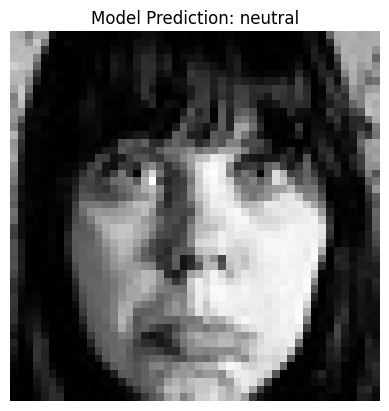

In [29]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

# Preprocessing function
def ef(image_path):
    img = load_img(image_path, color_mode='grayscale')  # Load image in grayscale
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)  # Reshape for model input
    return feature / 255.0  # Normalize the image

# Load the image
image_path = 'images/images/train/sad/403.jpg'  # Corrected path
print("Original image is of 'sad'")

# Preprocess the image
img = ef(image_path)

# Make a prediction using the model
pred = model.predict(img)

# Get the predicted label
pred_label = label[pred.argmax()]
print("Model prediction is:", pred_label)

# Display the image
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title(f"Model Prediction: {pred_label}")
plt.axis('off')  # Turn off axis
plt.show()


Original image is of 'fear'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Model prediction is: fear


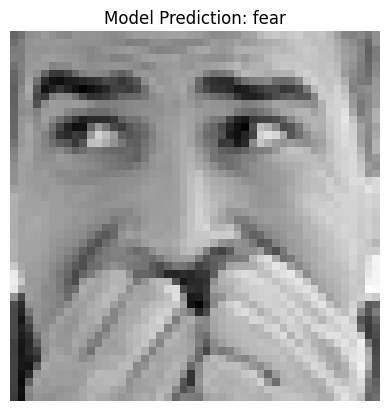

In [30]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

# Preprocessing function
def ef(image):
    img = load_img(image, color_mode='grayscale')  # Load image in grayscale
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)  # Reshape for model input
    return feature / 255.0  # Normalize the image

# Load the image
image_path = 'images/images/train/fear/190.jpg'
print("Original image is of 'fear'")

# Preprocess the image
img = ef(image_path)

# Make a prediction using the model
pred = model.predict(img)

# Get the predicted label
pred_label = label[pred.argmax()]
print("Model prediction is:", pred_label)

# Display the image
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title(f"Model Prediction: {pred_label}")
plt.axis('off')  # Turn off axis
plt.show()


Original image is of 'disgust'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Model prediction is: angry


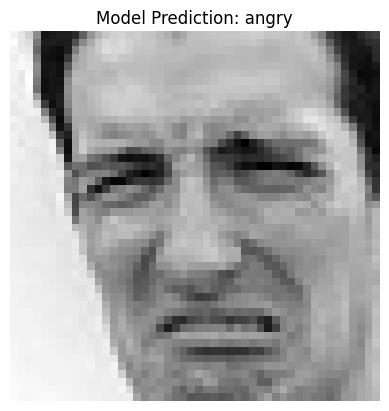

In [31]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

# Preprocessing function
def ef(image):
    img = load_img(image, color_mode='grayscale')  # Load image in grayscale
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)  # Reshape for model input
    return feature / 255.0  # Normalize the image

# Load the image
image_path = 'images/images/train/disgust/416.jpg'
print("Original image is of 'disgust'")

# Preprocess the image
img = ef(image_path)

# Make a prediction using the model
pred = model.predict(img)

# Get the predicted label
pred_label = label[pred.argmax()]
print("Model prediction is:", pred_label)

# Display the image
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title(f"Model Prediction: {pred_label}")
plt.axis('off')  # Turn off axis
plt.show()


Original image is of 'happy'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Model prediction is: happy


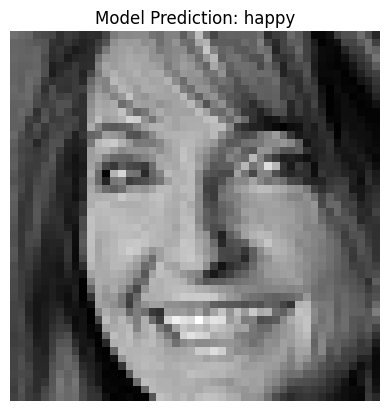

In [32]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

# Preprocessing function
def ef(image_path):
    img = load_img(image_path, color_mode='grayscale')  # Load image in grayscale
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)  # Reshape for model input
    return feature / 255.0  # Normalize the image

# Load the image
image_path = 'images/images/train/happy/105.jpg'
print("Original image is of 'happy'")

# Preprocess the image
img = ef(image_path)

# Make a prediction using the model
pred = model.predict(img)

# Get the predicted label
pred_label = label[pred.argmax()]
print("Model prediction is:", pred_label)

# Display the image
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title(f"Model Prediction: {pred_label}")
plt.axis('off')  # Turn off axis
plt.show()


original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
model prediction is  surprise


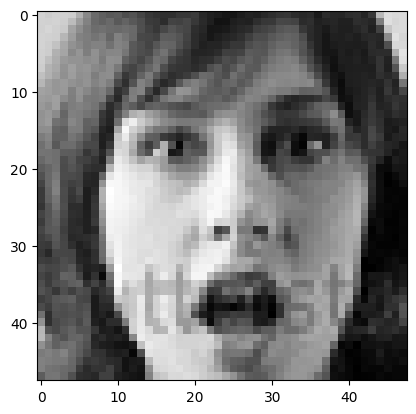

In [33]:
image = 'images/images/train/surprise/230.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
model prediction is  neutral


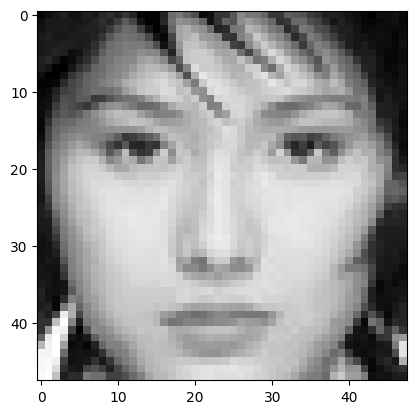

In [34]:
image = 'images/images/train/neutral/250.jpg'
print("original image is of neutral")
img = ef(image)
pred = model.predict(img)

pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [8]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

# Preprocessing function
def ef(image_path):
    img = load_img(image_path, color_mode='grayscale')  # Load image in grayscale
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)  # Reshape for model input
    return feature / 255.0  # Normalize the image

# Load the image
image_path = 'images/images/train/angry/248.jpg'
print("Original image is of 'angry'")

# Preprocess the image
img = ef(image_path)

# Make a prediction using the model
pred = model.predict(img)

# Get the predicted label
pred_label = label[pred.argmax()]
print("Model prediction is:", pred_label)

# Display the image
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title(f"Model Prediction: {pred_label}")
plt.axis('off')  # Turn off axis
plt.show()

Original image is of 'angry'


NameError: name 'model' is not defined

In [ ]:
import cv2
from keras.models import model_from_json
import numpy as np

# Load the model
with open("emotiondetector.json", "r") as json_file:
    model_json = json_file.read()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

# Load the Haar Cascade for face detection
haar_file = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haar_file)

# Function to preprocess the image
def extract_features(image):
    feature = np.array(image)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

# Initialize the webcam
webcam = cv2.VideoCapture(0)
labels = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}

# Create a named window
cv2.namedWindow("Output", cv2.WND_PROP_FULLSCREEN)
cv2.setWindowProperty("Output", cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

while True:
    ret, frame = webcam.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        face_image = gray[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        face_image = cv2.resize(face_image, (48, 48))
        img = extract_features(face_image)
        pred = model.predict(img)
        prediction_label = labels[pred.argmax()]
        cv2.putText(frame, prediction_label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    
    cv2.imshow("Output", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

webcam.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━